# **Polynomial Linear Regression**

## **Importing Libararies**

In [143]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### **Look of data**

In [144]:
df = pd.read_csv('salary.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000


## **Checking for distribution of data**

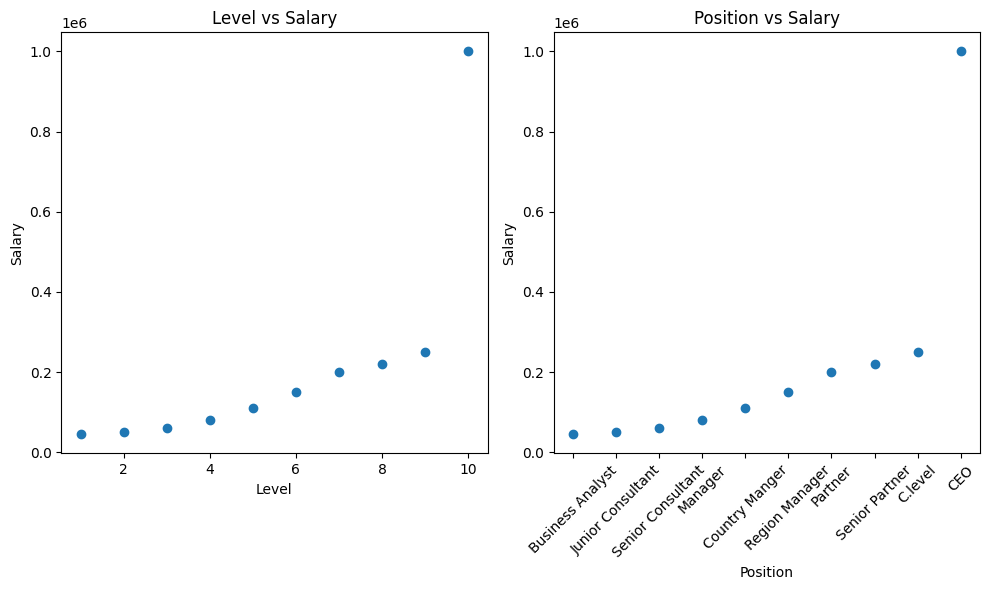

In [145]:
plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
plt.scatter(df['Level '], df['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Level vs Salary')

plt.subplot(1, 2, 2)
plt.scatter(df['Position'], df['Salary'])
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Position vs Salary')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## **Encoding Position column**

In [146]:
encoder = OneHotEncoder(sparse_output=False)
df['Position'] = encoder.fit_transform(df[['Position']])

## **Splitting input and output features**

In [147]:
X = df.drop(columns='Salary')
y = df['Salary']

## **Applying Polynomial Regression**

In [148]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

## **Splitting train test**

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

## **Training model**

In [150]:
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)

LinearRegression()

## **Calculating Prediction**

In [151]:
y_train_pred = poly_reg.predict(X_train)
y_test_pred = poly_reg.predict(X_test)

## **Calculating error**

In [152]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

In [153]:
print("Train MSE:", train_error)
print("Test MSE:", test_error)

Train MSE: 5679186343.959076
Test MSE: 94451311385.83395
